In [2]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')
display(churn_data.head(3))
import plotly
import plotly.express as px

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Ушедшие
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Лояльные
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Ушедшие


In [3]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited = churn_data['Exited'].value_counts().reset_index()

fig = px.pie(
    data_frame=exited,
    values='count',
    names='Exited',
    title='Соотношение лояльных и ушедших клиентов',
    height=500, 
    width=500, 
)
fig.show()

##### Как видно из круговой диаграммы, отношение ушедших клиентов к лояльным составляет 1/4.

In [4]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# распределение и сделайте выводы.
rich = churn_data[churn_data['Balance'] > 2500]
fig = px.histogram(
    data_frame=rich,
    x='Balance',
    nbins=30,
    text_auto=True,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
)
fig.update_xaxes(showgrid=True, gridwidth = 1) 
fig.show()


##### В основном на счету пользователей хранятся суммы от 50 до 200 тысяч долларов, чаще других пользователи хранят суммы около 130 тысяч, после этой суммы начинается явно выраженное снижение хранящихся сумм

In [5]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

exited_balance = churn_data.groupby(by='Exited')['Balance'].mean().round(2).reset_index()
display(exited_balance)

fig = px.bar(
    data_frame=exited_balance,
    x='Exited',
    y = 'Balance',
    color='Exited',
    width= 600,
    orientation='v',
    title='Среднее количество денег на счетах клиентов',
    text= 'Balance'
    
)
fig.update_layout(showlegend = False)
fig.show()

,Exited,Balance
0,Лояльные,72745.30
1,Ушедшие,91108.54


In [6]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
fig = px.box(
    data_frame=churn_data,
    x='Balance',
    y = 'Exited',
    color='Exited',
    width= 800,
    orientation='h',
    title='Количество денег на счетах клиентов'
)
fig.update_layout(showlegend = False)
fig.show()

#### Видно, что у ушедших клиентов на счетах хранилось большие суммы, чем у лояльных(меньше разброс, выше медианное значение). По этой информации сложно сказать что не устроило ушедших клиентов. Возможно отсутствие обслуживания для клиентов премиум-класса, возможно повышенные комиссии при обслуживании большей суммы.

In [7]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов стоит обратить внимание банку?
fig = px.box(
    data_frame=churn_data,
    x='Age',
    y = 'Exited',
    color='Exited',
    width= 800,
    orientation='h',
    title='Возраст клиентов'
)
fig.update_layout(showlegend = False)
fig.show()

#### Потенциальных выбросов больше у лояльных клиентов. Очевидно, что банку стоит обратить внимание на возрастную категорию от 40 до 50 лет, т.к. после 40 лет клиентам перестает нравиться этот банк.  

In [8]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.
display(churn_data.head(1))
fig = px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited' 
)
fig.show()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,Ушедшие


#### Никакой явной взаимосвязи между признаками нет. Даже на логарифмической шкале.

In [9]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
exit_gender = churn_data[churn_data['Exited'] == 'Ушедшие'].groupby(by='Gender',as_index=False).count()

fig = px.pie(
    data_frame=exit_gender,
    values='Exited',
    names='Gender',
    title="Соотношение ушедших по полу",
    width=400,
    height=400
)
fig.show()

In [10]:
df = pd.read_csv('data/churn.csv')
df = df.groupby(by='Gender',as_index=False)['Exited'].mean().round(2)
fig = px.bar(
    data_frame=df,
    x='Gender',
    y='Exited',
    #color='Exited',
    width=800,
    text_auto=True,
    title='Процент ухода из банка по полу'
     
)
fig.show()

#### Среди ушедших клиентов преобладают женщины (56% против 44%). Вообще исходя из вопроса задания это уже был бы логичный ответ, но прочитав подсказку, видимо интересует не соотношение ушедших, а как часто уходят женщины и мужчины. Так вот женщины чаще, 25 против 16 процентов у мужчин.

In [11]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
product_exited = churn_data.groupby(by=['NumOfProducts', 'Exited'],as_index=False).count()
fig = px.bar(
    data_frame=product_exited,
    x='NumOfProducts',
    y='CustomerId', 
    color='Exited',
    barmode='group',       # делим данные в одном столбце на два столбца
    width=600, height=400,
    text_auto=True,
    title='Разбивка клиентов по количеству приобретенных продуктов'
)
fig.update_layout(
    xaxis_title="Количество приобретенных продуктов",  #переименовываем оси
    yaxis_title="Количество клиентов"
)
fig.update_xaxes(nticks = 5)
fig.update_yaxes()
fig.show()
display(product_exited)

,NumOfProducts,Exited,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,1,Лояльные,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675
1,1,Ушедшие,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409
2,2,Лояльные,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
3,2,Ушедшие,348,348,348,348,348,348,348,348,348,348,348
4,3,Лояльные,46,46,46,46,46,46,46,46,46,46,46
5,3,Ушедшие,220,220,220,220,220,220,220,220,220,220,220
6,4,Ушедшие,60,60,60,60,60,60,60,60,60,60,60


#### Из диаграммы видно, что у из пользователей, которые оформляли более двух продуктов, почти все ушли из этого банка. 

,IsActiveMember,Exited,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,0,Лояльные,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
1,0,Ушедшие,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302
2,1,Лояльные,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416
3,1,Ушедшие,735,735,735,735,735,735,735,735,735,735,735


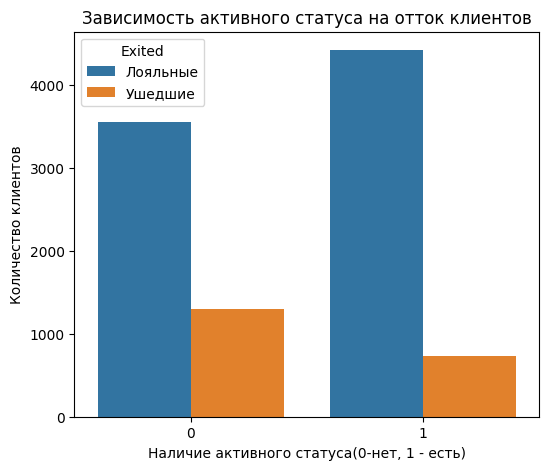

In [18]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
active_exited = churn_data.groupby(by=['IsActiveMember','Exited'], as_index=False).count()
display(active_exited)
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,5));
barplot = sns.barplot(
    data=active_exited,
    x='IsActiveMember',
    y='CustomerId',
    hue = 'Exited'
);
barplot.set_title('Зависимость активного статуса на отток клиентов');
barplot.set_xlabel('Наличие активного статуса(0-нет, 1 - есть)');
barplot.set_ylabel('Количество клиентов');


#### Пользователи, имеющие активный статус реже отказываются от услуг банка, чем те, у кого активного статуса нет.

In [13]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
country = pd.read_csv('data/churn.csv')
country = country.groupby(by='Geography',as_index=False)['Exited'].mean()

display(country)
fig = px.choropleth(
    data_frame=country,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    title='Процент ушедших клиентов по странам',
    width=500,
    height=600,
    range_color=[0, 0.6], # диапазон цвета
    color_continuous_scale='Reds', # палитра цветов
    scope='europe' # фокус карты на Европе
    
)
fig.show()

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


#### В Испании и Франции процент ушедших меньше, возможно там меньше конкуренция между банками. Тяжело предположить, слишком мало данных.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


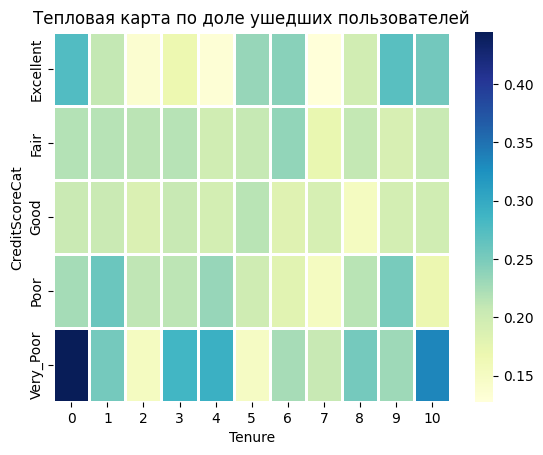

In [ ]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), 
# которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat),
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
credit_exited = pd.read_csv('data/churn.csv')
credit_exited['CreditScoreCat'] = credit_exited['CreditScore'].apply(get_credit_score_cat)

credit_tenure_pivot = credit_exited.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
display(credit_tenure_pivot)
fig = sns.heatmap(
    credit_tenure_pivot,
    linewidth=1,
    #linecolor='w',
    cmap='YlGnBu',
)
fig.set_title('Тепловая карта по доле ушедших пользователей')

fig2.show()


#### Чаще всего уходят люди с низким кредитным рейтингом. На втором месте по степени ухода - люди с превосходным рейтингом (косвенно мы видели это в задании 9.3, что у ушедших людей было на счетах больше денег, т.е. это обеспеченные люди у которых нет проблем с возвратом кредитов). Меньше всего уходят люди со средним рейтингом, при чем по времени пользования услугами банка зависимости практически нет. Возможно лишь первый год, когда пользователь тестирует услуги банка.

In [22]:
# Делаем два графика рядом в Plotpy 
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Пример данных
df = px.data.iris()

# Создаем два графика с помощью plotly.express
fig1 = px.scatter(df, x='sepal_width', y='sepal_length', color='species')
fig2 = px.scatter(df, x='petal_width', y='petal_length', color='species')

# Создаем подграфики с двумя колонками
fig = sp.make_subplots(rows=1, cols=2)

# Добавляем первый график в первую колонку
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1)
fig.add_trace(fig1.data[2], row=1, col=1)

# Добавляем второй график во вторую колонку
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig2.data[1], row=1, col=2)
fig.add_trace(fig2.data[2], row=1, col=2)

# Обновляем макет, чтобы подписи осей соответствовали исходным графикам
fig.update_layout(
    title_text="Два графика рядом",
    xaxis_title=fig1.layout.xaxis.title,
    yaxis_title=fig1.layout.yaxis.title,
    xaxis2_title=fig2.layout.xaxis.title,
    yaxis2_title=fig2.layout.yaxis.title
)

# Показываем фигуру
fig.show()

In [16]:
import pandas as pd
import plotly
import plotly.express as px


df = pd.DataFrame({
    'number':[1,2,3,4,5,6,7,8,9,10,11,12],
    'money':[5,25,40,50,65,80,80,85,90,100,110,120]
})
#display(df)
   
fig = px.box(
    data_frame=df,
    x='money',
    #y = 'Exited',
    #color='Exited',
    width= 800,
    orientation='h',
    title='Количество денег на счетах клиентов'
)
fig.update_layout(showlegend = False)
fig.show()


In [17]:
df2 = pd.DataFrame({
    'number':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'money':[25,25,30,33,40,45,50,55,60,68,75,80,80,90,90]
})
#display(df)
   
fig = px.box(
    data_frame=df2,
    x='money',
    #y = 'Exited',
    #color='Exited',
    width= 800,
    orientation='h',
    title='Количество денег на счетах клиентов'
)
fig.update_layout(showlegend = False)
fig.show()
